참고 : https://datascienceschool.net/view-notebook/465066ac92ef4da3b0aba32f76d9750a/

In [4]:
from datetime import date, datetime, timedelta
import pandas as pd
pd.options.display.max_rows=5

## datetime 타입 컬럼 활용

### .dt 활용 - 기본 사용법을 컬럼에 적용
    원하는 값을 추출해 새로운 컬럼을 만들 때 유용하다.

In [2]:
df = pd.DataFrame({'datetime':pd.date_range(start='2019-11-01', end='2019-11-10')})

In [6]:
# weekday, quarter, month, month_name, day_name 등등 가능
df.datetime.dt.date
## datetime은 없음

0    2019-11-01
1    2019-11-02
        ...    
8    2019-11-09
9    2019-11-10
Name: datetime, Length: 10, dtype: object

strftime : 표현형식 지정

In [8]:
df.datetime.dt.strftime('%y/%m/%d')

0    19/11/01
1    19/11/02
       ...   
8    19/11/09
9    19/11/10
Name: datetime, Length: 10, dtype: object

### index 컬럼으로 지정하면 유용하게 활용 가능

In [9]:
df.set_index('datetime',inplace=True)

In [12]:
df.index.day # vectorization

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int64', name='datetime')

### between 함수 활용

(left <= Series) & (Series <= right)와 같음

In [3]:
df['datetime'].between('2019-11-05','2019-11-08')

0    False
1    False
     ...  
8    False
9    False
Name: datetime, Length: 10, dtype: bool

## shift 함수 활용
    shift는 해당 기간만큼 데이터를 옮긴다.

#### 기간이 의미있는 데이터에서 각 컬럼 간 시작점을 통일하여 데이터를 비교할 수 있다.

In [27]:
date_df = pd.DataFrame({'date': pd.date_range(start='2018-11-10', end='2018-11-20'),'col1':[None]*2+[10,20,30,15,8,40,3,22]+[None], 'col2':[None]*5+[50,30,20,10]+[None]*2})
date_df.set_index('date', inplace=True)
date_df

col1  col2
date                  
2018-11-10   NaN   NaN
2018-11-11   NaN   NaN
2018-11-12  10.0   NaN
2018-11-13  20.0   NaN
2018-11-14  30.0   NaN
...          ...   ...
2018-11-16   8.0  30.0
2018-11-17  40.0  20.0
2018-11-18   3.0  10.0
2018-11-19  22.0   NaN
2018-11-20   NaN   NaN

[11 rows x 2 columns]

#### Series의 함수를 통해 첫번째로 값이 존재하는 날을 파악할 수 있다.

In [28]:
first_valid = date_df.apply(pd.Series.first_valid_index)
first_valid

col1   2018-11-12
col2   2018-11-15
dtype: datetime64[ns]

index 시작점을 기준으로 차이일 수를 확인하고 shift 함수에 적용한다.

In [29]:
shift_date = first_valid-date_df.index.min()
shift_date

col1   2 days
col2   5 days
dtype: timedelta64[ns]

In [30]:
date_df.index = (date_df.index - date_df.index.min()).days # 그래프에 일 수를 표시하기 위한 index
date_df.col1 = date_df.col1.shift(-shift_date[0].days) # 역수로 shift
date_df.col2 = date_df.col2.shift(-shift_date[1].days) # 역수로 shift

In [31]:
# 데이터가 앞으로 옮겨진 것을 확인할 수 있다.
date_df

col1  col2
date            
0     10.0  50.0
1     20.0  30.0
2     30.0  20.0
3     15.0  10.0
4      8.0   NaN
...    ...   ...
6      3.0   NaN
7     22.0   NaN
8      NaN   NaN
9      NaN   NaN
10     NaN   NaN

[11 rows x 2 columns]

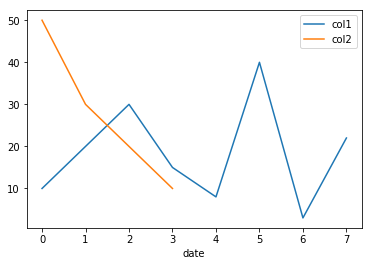

In [32]:
# col2는 3일 만에 데이터가 끝나고 col1은 7일 까지 존재하고 시각적으로 확인
date_df.plot(kind='line', y=['col1','col2'])